In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf

import datetime as dt

import sys
sys.path.append('/Users/arnav/personal_code/time_series_analysis')


In [2]:
from api import TimeSeriesApi

In [3]:
def get_price_history(tickers: list[str], start_timestamp: pd.Timestamp, end_timestamp: pd.Timestamp) -> pd.DataFrame:
    price_tickers = yf.Tickers(*tickers)
    price_history = price_tickers.history(start=start_timestamp, end=end_timestamp)
    return price_history

In [4]:
def get_vix_closing_prices(start_timestamp: pd.Timestamp, end_timestamp: pd.Timestamp) -> pd.DataFrame:
    vix = yf.Ticker("^VIX")
    vix_data = vix.history(start=start_timestamp, end=end_timestamp)
    return vix_data

def get_spx_close_prices(start_timestamp: pd.Timestamp, end_timestamp: pd.Timestamp) -> pd.DataFrame:
    spx = yf.Ticker("^GSPC")
    spx_data = spx.history(start=start_timestamp, end=end_timestamp)
    return spx_data

In [5]:
start = pd.Timestamp("1970-01-01 00:00:00", tz="America/Chicago").tz_convert("UTC")
end = pd.Timestamp.now(tz="America/Chicago").tz_convert("UTC")

vix_df = get_vix_closing_prices(start, end)

In [6]:
ts_api = TimeSeriesApi(df=vix_df)

In [7]:
ts_api().head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1990-01-02 00:00:00-06:00,17.240000,17.240000,17.240000,17.240000,0,0.0,0.0
1990-01-03 00:00:00-06:00,18.190001,18.190001,18.190001,18.190001,0,0.0,0.0
1990-01-04 00:00:00-06:00,19.219999,19.219999,19.219999,19.219999,0,0.0,0.0
1990-01-05 00:00:00-06:00,20.110001,20.110001,20.110001,20.110001,0,0.0,0.0
1990-01-08 00:00:00-06:00,20.260000,20.260000,20.260000,20.260000,0,0.0,0.0


In [8]:
ts_api.log_returns(col_names=["Close"])

In [9]:
ts_api().head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_log_return
Date,,,,,,,,
1990-01-02 00:00:00-06:00,17.240000,17.240000,17.240000,17.240000,0,0.0,0.0,NaN
1990-01-03 00:00:00-06:00,18.190001,18.190001,18.190001,18.190001,0,0.0,0.0,0.053640
1990-01-04 00:00:00-06:00,19.219999,19.219999,19.219999,19.219999,0,0.0,0.0,0.055079
1990-01-05 00:00:00-06:00,20.110001,20.110001,20.110001,20.110001,0,0.0,0.0,0.045266
1990-01-08 00:00:00-06:00,20.260000,20.260000,20.260000,20.260000,0,0.0,0.0,0.007431


In [10]:
vix_df.describe(percentiles=[0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.975, 0.99, 0.999, 0.9999])

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_log_return
count,8666.000000,8666.000000,8666.000000,8666.000000,8666.0,8666.0,8666.0,8665.000000
mean,19.610874,20.410910,18.857045,19.519424,0.0,0.0,0.0,-0.000042
std,7.960502,8.415789,7.452924,7.885941,0.0,0.0,0.0,0.066724
min,9.010000,9.310000,8.560000,9.140000,0.0,0.0,0.0,-0.350589
5%,11.380000,11.832500,11.020000,11.370000,0.0,0.0,0.0,-0.097073
10%,12.100000,12.600000,11.690000,12.080000,0.0,0.0,0.0,-0.072799
25%,13.910000,14.490000,13.382500,13.830000,0.0,0.0,0.0,-0.037955
50%,17.719999,18.375000,17.105000,17.670000,0.0,0.0,0.0,-0.003986
75%,23.040001,23.897500,22.260000,22.900000,0.0,0.0,0.0,0.032216
90%,28.940001,30.040001,27.895000,28.799999,0.0,0.0,0.0,0.074261


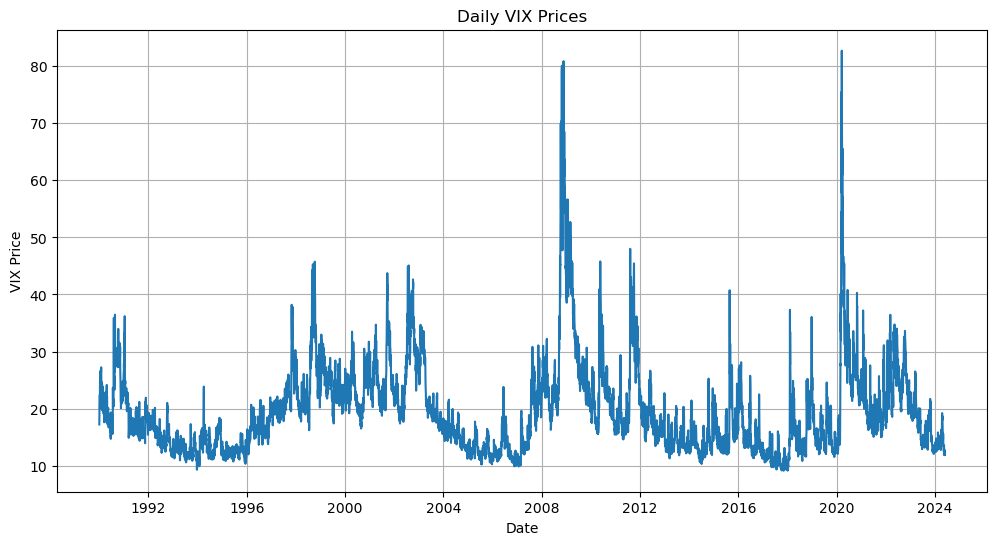

In [11]:
import matplotlib.pyplot as plt

# Plotting the daily VIX prices
plt.figure(figsize=(12, 6))
plt.plot(vix_df.index, vix_df['Close'])
plt.xlabel('Date')
plt.ylabel('VIX Price')
plt.title('Daily VIX Prices')
plt.grid(True)
plt.show()

In [12]:
ts_api.log_returns(col_names=['Close'])

In [13]:
ts_api().head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_log_return
Date,,,,,,,,
1990-01-02 00:00:00-06:00,17.240000,17.240000,17.240000,17.240000,0,0.0,0.0,NaN
1990-01-03 00:00:00-06:00,18.190001,18.190001,18.190001,18.190001,0,0.0,0.0,0.053640
1990-01-04 00:00:00-06:00,19.219999,19.219999,19.219999,19.219999,0,0.0,0.0,0.055079
1990-01-05 00:00:00-06:00,20.110001,20.110001,20.110001,20.110001,0,0.0,0.0,0.045266
1990-01-08 00:00:00-06:00,20.260000,20.260000,20.260000,20.260000,0,0.0,0.0,0.007431


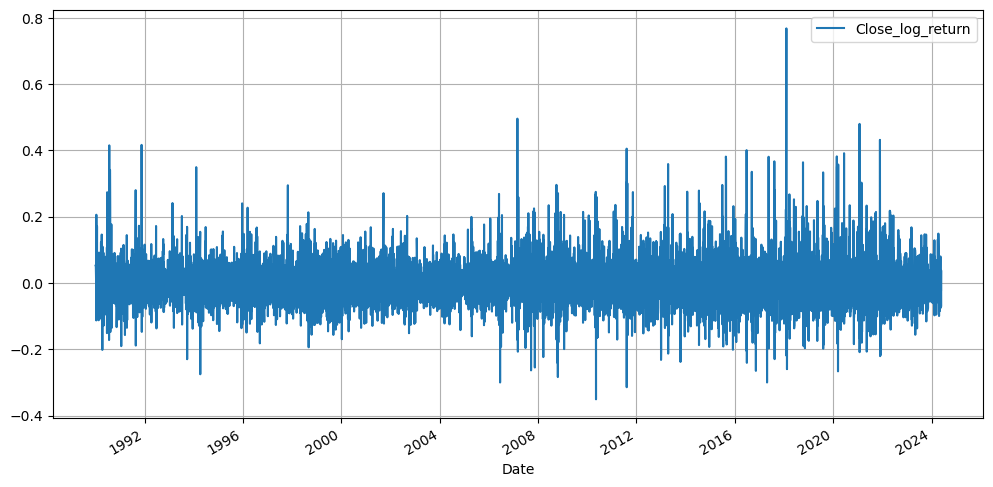

In [14]:
ts_api.plot(col_names=['Close_log_return'], figsize=(12, 6), grid=True)

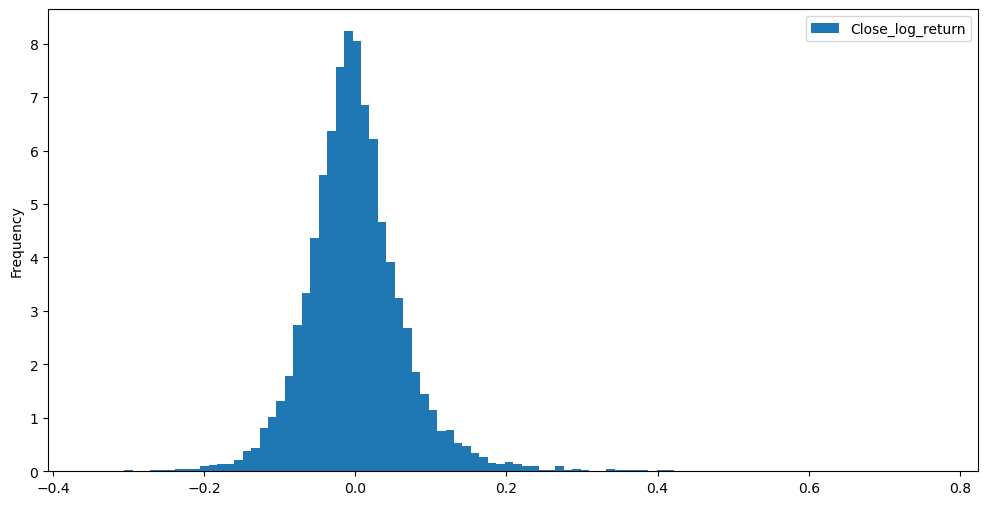

In [15]:
ts_api.histogram(col_names=['Close_log_return'], figsize=(12, 6), bins=100, density=True)

In [16]:
ts_api.exponential_moving_average(col_names=['Close'], windows=[5, 10, 20, 50, 100, 200, 365, 720])

In [17]:
ts_api().head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_log_return,Close_ema_5,Close_ema_10,Close_ema_20,Close_ema_50,Close_ema_100,Close_ema_200,Close_ema_365,Close_ema_720
Date,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-06:00,17.240000,17.240000,17.240000,17.240000,0,0.0,0.0,NaN,17.240000,17.240000,17.240000,17.240000,17.240000,17.240000,17.240000,17.240000
1990-01-03 00:00:00-06:00,18.190001,18.190001,18.190001,18.190001,0,0.0,0.0,0.053640,17.556667,17.412727,17.330476,17.277255,17.258812,17.249453,17.245191,17.242635
1990-01-04 00:00:00-06:00,19.219999,19.219999,19.219999,19.219999,0,0.0,0.0,0.055079,18.111111,17.741322,17.510431,17.353441,17.297647,17.269060,17.255982,17.248120
1990-01-05 00:00:00-06:00,20.110001,20.110001,20.110001,20.110001,0,0.0,0.0,0.045266,18.777407,18.171991,17.758009,17.461541,17.353337,17.297328,17.271578,17.256059
1990-01-08 00:00:00-06:00,20.260000,20.260000,20.260000,20.260000,0,0.0,0.0,0.007431,19.271605,18.551629,17.996294,17.571285,17.410895,17.326807,17.287908,17.264391


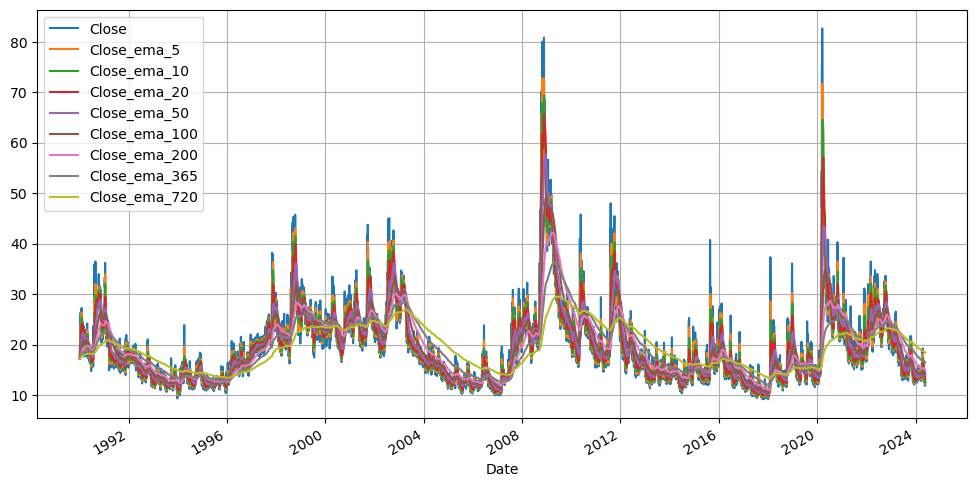

In [18]:
ts_api.line_plot(col_names=['Close', 'Close_ema_5', 'Close_ema_10', 'Close_ema_20', 'Close_ema_50', 'Close_ema_100', 'Close_ema_200', "Close_ema_365", "Close_ema_720"], figsize=(12, 6), grid=True)

In [19]:
ts_api().head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_log_return,Close_ema_5,Close_ema_10,Close_ema_20,Close_ema_50,Close_ema_100,Close_ema_200,Close_ema_365,Close_ema_720
Date,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-06:00,17.240000,17.240000,17.240000,17.240000,0,0.0,0.0,NaN,17.240000,17.240000,17.240000,17.240000,17.240000,17.240000,17.240000,17.240000
1990-01-03 00:00:00-06:00,18.190001,18.190001,18.190001,18.190001,0,0.0,0.0,0.053640,17.556667,17.412727,17.330476,17.277255,17.258812,17.249453,17.245191,17.242635
1990-01-04 00:00:00-06:00,19.219999,19.219999,19.219999,19.219999,0,0.0,0.0,0.055079,18.111111,17.741322,17.510431,17.353441,17.297647,17.269060,17.255982,17.248120
1990-01-05 00:00:00-06:00,20.110001,20.110001,20.110001,20.110001,0,0.0,0.0,0.045266,18.777407,18.171991,17.758009,17.461541,17.353337,17.297328,17.271578,17.256059
1990-01-08 00:00:00-06:00,20.260000,20.260000,20.260000,20.260000,0,0.0,0.0,0.007431,19.271605,18.551629,17.996294,17.571285,17.410895,17.326807,17.287908,17.264391


In [20]:
tzinfo = dt.timezone(dt.timedelta(hours=-6))

In [21]:
df_this_year = ts_api().loc[dt.datetime(2024, 1, 1, tzinfo=tzinfo):]

In [22]:
df_this_year

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_log_return,Close_ema_5,Close_ema_10,Close_ema_20,Close_ema_50,Close_ema_100,Close_ema_200,Close_ema_365,Close_ema_720
Date,,,,,,,,,,,,,,,,
2024-01-02 00:00:00-06:00,13.22,14.23,13.10,13.20,0,0.0,0.0,0.058496,12.821640,12.808334,12.948052,13.923304,14.866028,16.318882,18.147821,19.786585
2024-01-03 00:00:00-06:00,13.35,14.22,13.33,14.04,0,0.0,0.0,0.061694,13.227760,13.032274,13.052047,13.927881,14.849671,16.296206,18.125374,19.770645
2024-01-04 00:00:00-06:00,13.93,14.20,13.64,14.13,0,0.0,0.0,0.006390,13.528507,13.231860,13.154709,13.935807,14.835420,16.274652,18.103542,19.754998
2024-01-05 00:00:00-06:00,14.24,14.58,13.29,13.35,0,0.0,0.0,-0.056784,13.469005,13.253340,13.173308,13.912834,14.806006,16.245551,18.077566,19.737231
2024-01-08 00:00:00-06:00,14.00,14.18,13.02,13.08,0,0.0,0.0,-0.020432,13.339336,13.221824,13.164422,13.880174,14.771827,16.214053,18.050257,19.718764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-20 00:00:00-05:00,12.27,12.59,12.07,12.15,0,0.0,0.0,0.013256,12.410498,12.869142,13.633137,14.273036,14.409186,15.062723,16.551906,18.483660
2024-05-21 00:00:00-05:00,12.30,12.56,11.84,11.86,0,0.0,0.0,-0.024158,12.226999,12.685662,13.464267,14.178407,14.358707,15.030855,16.526267,18.465286
2024-05-22 00:00:00-05:00,12.05,12.81,11.78,12.29,0,0.0,0.0,0.035615,12.247999,12.613723,13.352432,14.104352,14.317742,15.003583,16.503118,18.448156


In [23]:
ts_api()[ts_api().Close < 11.93]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_log_return,Close_ema_5,Close_ema_10,Close_ema_20,Close_ema_50,Close_ema_100,Close_ema_200,Close_ema_365,Close_ema_720
Date,,,,,,,,,,,,,,,,
1992-12-04 00:00:00-06:00,11.69,12.46,11.54,11.81,0,0.0,0.0,-0.018457,12.302139,12.770494,13.560350,14.582720,14.924115,15.429210,16.330413,17.429733
1992-12-08 00:00:00-06:00,10.29,12.38,10.29,11.73,0,0.0,0.0,-0.022757,12.044284,12.466694,13.251579,14.373538,14.804109,15.358620,16.281740,17.398903
1992-12-18 00:00:00-06:00,12.03,12.58,10.64,11.66,0,0.0,0.0,-0.040342,12.137570,12.307381,12.744163,13.823963,14.445470,15.129944,16.114695,17.288787
1992-12-21 00:00:00-06:00,11.66,11.97,11.20,11.65,0,0.0,0.0,-0.000858,11.975047,12.187857,12.639957,13.738709,14.390114,15.095318,16.090298,17.273145
1992-12-22 00:00:00-06:00,10.57,12.81,10.36,11.75,0,0.0,0.0,0.008547,11.900031,12.108247,12.555199,13.660721,14.337834,15.062031,16.066580,17.257825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-03 00:00:00-05:00,11.66,12.14,11.34,11.61,0,0.0,0.0,-0.037198,11.979419,12.172232,12.421281,12.793828,13.364161,13.699795,13.679988,14.014745
2019-11-25 00:00:00-06:00,12.51,12.59,11.73,11.87,0,0.0,0.0,-0.038832,12.404668,12.559883,12.908296,14.030853,14.859647,15.433677,15.537483,15.320917
2019-11-26 00:00:00-06:00,11.88,12.04,11.42,11.54,0,0.0,0.0,-0.028195,12.116445,12.374450,12.777982,13.933173,14.793911,15.394934,15.515639,15.310429


<Axes: xlabel='Date'>

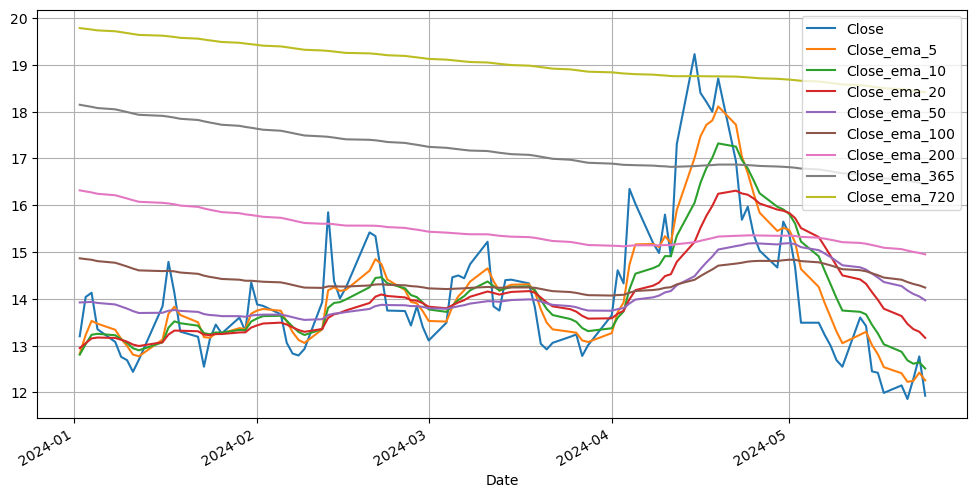

In [24]:
df_this_year[["Close", "Close_ema_5", "Close_ema_10", "Close_ema_20", "Close_ema_50", "Close_ema_100", "Close_ema_200", "Close_ema_365", "Close_ema_720"]].plot(kind='line', figsize=(12, 6), grid=True)

In [25]:
df = ts_api()
trade_condition = (
    ((df["Close"] < df["Close_ema_5"]) & 
    (df["Close"] < df["Close_ema_10"]) & 
    (df["Close"] < df["Close_ema_20"]) & 
    (df["Close"] < df["Close_ema_50"]) & 
    (df["Close"] < df["Close_ema_100"]) & 
    (df["Close"] < df["Close_ema_200"]) & 
    (df["Close"] < df["Close_ema_365"]) & 
    (df["Close"] < df["Close_ema_720"]))
)

df["TRADE_VIX"] = trade_condition
df["EXIT_PRICE"] = df["Close"].shift(-30)
df["PROFIT"] = np.where(df["GO_LONG_VIX"] & ~df["EXIT_PRICE"].isnull(), df["EXIT_PRICE"] - df["Close"], 0)

KeyError: 'GO_LONG_VIX'

In [ ]:
df[df["PROFIT"] != 0.0]["PROFIT"].describe(percentiles=[0.05, 0.1, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.75, 0.9, 0.95, 0.975, 0.99, 0.999, 0.9999])

count     2692.000000
mean         1.706720
std          4.273089
min         -6.940001
5%          -2.884499
10%         -1.940001
25%         -0.640001
30%         -0.297000
35%          0.010000
40%          0.290000
45%          0.530000
50%          0.810000
75%          2.790000
90%          5.917999
95%          9.564500
97.5%       12.707998
99%         18.436100
99.9%       33.663811
99.99%      50.278618
max         51.390001
Name: PROFIT, dtype: float64

In [ ]:
df[df["GO_LONG_VIX"]]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_log_return,Close_ema_5,Close_ema_10,Close_ema_20,Close_ema_50,Close_ema_100,Close_ema_200,Close_ema_365,Close_ema_720,GO_LONG_VIX
Date,,,,,,,,,,,,,,,,,
1990-03-16 00:00:00-06:00,17.620001,17.620001,17.620001,17.620001,0,0.0,0.0,-0.065354,19.047103,19.831320,20.822101,21.384475,20.562238,19.394930,18.575242,17.969629,True
1990-04-11 00:00:00-05:00,17.730000,17.730000,17.730000,17.730000,0,0.0,0.0,-0.201593,20.357455,20.645900,20.691855,20.976850,20.559583,19.582428,18.758233,18.093902,True
1990-05-03 00:00:00-05:00,17.809999,17.809999,17.809999,17.809999,0,0.0,0.0,-0.081381,19.162730,19.990437,20.513309,20.873032,20.630003,19.761906,18.926300,18.208354,True
1990-05-04 00:00:00-05:00,17.280001,17.280001,17.280001,17.280001,0,0.0,0.0,-0.030210,18.535154,19.497630,20.205374,20.732129,20.563666,19.737211,18.917304,18.205779,True
1990-05-07 00:00:00-05:00,17.650000,17.650000,17.650000,17.650000,0,0.0,0.0,0.021186,18.240102,19.161697,19.962005,20.611261,20.505970,19.716442,18.910379,18.204238,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-16 00:00:00-05:00,12.520000,12.670000,12.330000,12.420000,0,0.0,0.0,-0.002413,12.816121,13.259830,13.978652,14.456413,14.504620,15.123172,16.601291,18.519390,True
2024-05-17 00:00:00-05:00,12.280000,12.480000,11.910000,11.990000,0,0.0,0.0,-0.035235,12.540747,13.028952,13.789256,14.359691,14.454826,15.091996,16.576092,18.501278,True
2024-05-20 00:00:00-05:00,12.270000,12.590000,12.070000,12.150000,0,0.0,0.0,0.013256,12.410498,12.869142,13.633137,14.273036,14.409186,15.062723,16.551906,18.483660,True


In [27]:
stock_prices = get_price_history(["AAPL AMZN NVDA TSLA SMCI MSFT GOOGL META ^GSPC ^NDX ^VIX"], pd.Timestamp("2021-01-01 00:00:00", tz="America/Chicago").tz_convert("UTC"), pd.Timestamp.now(tz="America/Chicago").tz_convert("UTC"))

[*********************100%%**********************]  11 of 11 completed


In [29]:
stock_prices.columns

MultiIndex([(       'Close',  'AAPL'),
            (       'Close',  'AMZN'),
            (       'Close', 'GOOGL'),
            (       'Close',  'META'),
            (       'Close',  'MSFT'),
            (       'Close',  'NVDA'),
            (       'Close',  'SMCI'),
            (       'Close',  'TSLA'),
            (       'Close', '^GSPC'),
            (       'Close',  '^NDX'),
            (       'Close',  '^VIX'),
            (   'Dividends',  'AAPL'),
            (   'Dividends',  'AMZN'),
            (   'Dividends', 'GOOGL'),
            (   'Dividends',  'META'),
            (   'Dividends',  'MSFT'),
            (   'Dividends',  'NVDA'),
            (   'Dividends',  'SMCI'),
            (   'Dividends',  'TSLA'),
            (   'Dividends', '^GSPC'),
            (   'Dividends',  '^NDX'),
            (   'Dividends',  '^VIX'),
            (        'High',  'AAPL'),
            (        'High',  'AMZN'),
            (        'High', 'GOOGL'),
            (        'Hig

In [30]:
stock_prices.head()

Price            Close                                                 \
Ticker            AAPL        AMZN      GOOGL        META        MSFT   
Date                                                                    
2021-01-04  126.830055  159.331497  86.306503  268.654968  211.224350   
2021-01-05  128.398178  160.925507  87.002502  270.682800  211.428055   
2021-01-06  124.076088  156.919006  86.143997  263.030914  205.945877   
2021-01-07  128.309998  158.108002  88.717003  268.455170  211.806473   
2021-01-08  129.417465  159.134995  89.891502  267.286407  213.097000   

Price                                                                     ...  \
Ticker            NVDA       SMCI        TSLA        ^GSPC          ^NDX  ...   
Date                                                                      ...   
2021-01-04  130.834000  31.049999  243.256668  3700.649902  12694.660156  ...   
2021-01-05  133.739792  31.160000  245.036667  3726.860107  12802.379883  ...   
2021-01-06  125.855431  31.889999  251.993332  3748.139893  12623.349609  ...   
2021-01-07  133.133667  32.189999  272.013336  3803.790039  12939.570312  ...   
2021-01-08  132.462738  31.879999  293.339996  3824.679932  13105.200195  ...   

Price         Volume                                                  \
Ticker          AMZN     GOOGL      META      MSFT      NVDA    SMCI   
Date                                                                   
2021-01-04  88228000  37324000  15106100  37130100  56064000  242500   
2021-01-05  53110000  20360000   9871600  23823000  32276000  215600   
2021-01-06  87896000  46588000  24354100  35930700  58042400  334700   
2021-01-07  70290000  41936000  15789800  27694500  46148000  620900   
2021-01-08  70754000  35484000  18528300  22956200  29252800  261800   

Price                                               
Ticker           TSLA       ^GSPC        ^NDX ^VIX  
Date                                                
2021-01-04  145914600  5015000000  6636170000    0  
2021-01-05   96735600  4591020000  6971860000    0  
2021-01-06  134100000  6064110000  7689880000    0  
2021-01-07  154496700  5099160000  6841480000    0  
2021-01-08  225166500  4773040000  7289390000    0  

[5 rows x 77 columns]

In [31]:
stock_prices.melt??

Signature:
stock_prices.melt(
    id_vars=None,
    value_vars=None,
    var_name=None,
    value_name: 'Hashable' = 'value',
    col_level: 'Level' = None,
    ignore_index: 'bool' = True,
) -> 'DataFrame'
Docstring:
Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.

This function is useful to massage a DataFrame into a format where one
or more columns are identifier variables (`id_vars`), while all other
columns, considered measured variables (`value_vars`), are "unpivoted" to
the row axis, leaving just two non-identifier columns, 'variable' and
'value'.

Parameters
----------
id_vars : tuple, list, or ndarray, optional
    Column(s) to use as identifier variables.
value_vars : tuple, list, or ndarray, optional
    Column(s) to unpivot. If not specified, uses all columns that
    are not set as `id_vars`.
var_name : scalar
    Name to use for the 'variable' column. If None it uses
    ``frame.columns.name`` or 'variable'.
value_name : scalar, default '

In [32]:
stock_prices.columns.get_level_values(0).unique()

Index(['Close', 'Dividends', 'High', 'Low', 'Open', 'Stock Splits', 'Volume'], dtype='object', name='Price')

In [33]:
final_df = (
    stock_prices
    .reset_index()
    .melt(id_vars="Date")
    .pivot(index=["Date", "Ticker"], columns="Price", values="value")
    .reset_index()
    [["Date", "Ticker", "Close"]]
    .pivot(index="Date", columns="Ticker", values="Close")
)

print(final_df.head())

stock_ts = TimeSeriesApi(df=final_df)

Ticker            AAPL        AMZN      GOOGL        META        MSFT  \
Date                                                                    
2021-01-04  126.830055  159.331497  86.306503  268.654968  211.224350   
2021-01-05  128.398178  160.925507  87.002502  270.682800  211.428055   
2021-01-06  124.076088  156.919006  86.143997  263.030914  205.945877   
2021-01-07  128.309998  158.108002  88.717003  268.455170  211.806473   
2021-01-08  129.417465  159.134995  89.891502  267.286407  213.097000   

Ticker            NVDA       SMCI        TSLA        ^GSPC          ^NDX  \
Date                                                                       
2021-01-04  130.834000  31.049999  243.256668  3700.649902  12694.660156   
2021-01-05  133.739792  31.160000  245.036667  3726.860107  12802.379883   
2021-01-06  125.855431  31.889999  251.993332  3748.139893  12623.349609   
2021-01-07  133.133667  32.189999  272.013336  3803.790039  12939.570312   
2021-01-08  132.462738  31.87999

In [34]:
stock_ts().head()

Ticker,AAPL,AMZN,GOOGL,META,MSFT,NVDA,SMCI,TSLA,^GSPC,^NDX,^VIX
Date,,,,,,,,,,,
2021-01-04,126.830055,159.331497,86.306503,268.654968,211.224350,130.834000,31.049999,243.256668,3700.649902,12694.660156,26.969999
2021-01-05,128.398178,160.925507,87.002502,270.682800,211.428055,133.739792,31.160000,245.036667,3726.860107,12802.379883,25.340000
2021-01-06,124.076088,156.919006,86.143997,263.030914,205.945877,125.855431,31.889999,251.993332,3748.139893,12623.349609,25.070000
2021-01-07,128.309998,158.108002,88.717003,268.455170,211.806473,133.133667,32.189999,272.013336,3803.790039,12939.570312,22.370001
2021-01-08,129.417465,159.134995,89.891502,267.286407,213.097000,132.462738,31.879999,293.339996,3824.679932,13105.200195,21.559999


In [35]:
stock_ts.log_returns(col_names=stock_ts().columns)

df = stock_ts()

for col in df.columns:
    if "log_return" in col:
        df[f"{col}_cumulative"] = df[col].cumsum()

In [36]:
df.head()

Ticker,AAPL,AMZN,GOOGL,META,MSFT,NVDA,SMCI,TSLA,^GSPC,^NDX,...,AMZN_log_return_cumulative,GOOGL_log_return_cumulative,META_log_return_cumulative,MSFT_log_return_cumulative,NVDA_log_return_cumulative,SMCI_log_return_cumulative,TSLA_log_return_cumulative,^GSPC_log_return_cumulative,^NDX_log_return_cumulative,^VIX_log_return_cumulative
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,126.830055,159.331497,86.306503,268.654968,211.224350,130.834000,31.049999,243.256668,3700.649902,12694.660156,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,128.398178,160.925507,87.002502,270.682800,211.428055,133.739792,31.160000,245.036667,3726.860107,12802.379883,...,0.009955,0.008032,0.007520,0.000964,0.021967,0.003536,0.007291,0.007058,0.008450,-0.062341
2021-01-06,124.076088,156.919006,86.143997,263.030914,205.945877,125.855431,31.889999,251.993332,3748.139893,12623.349609,...,-0.015257,-0.001885,-0.021156,-0.025307,-0.038795,0.026694,0.035285,0.012751,-0.005633,-0.073053
2021-01-07,128.309998,158.108002,88.717003,268.455170,211.806473,133.133667,32.189999,272.013336,3803.790039,12939.570312,...,-0.007709,0.027547,-0.000744,0.002752,0.017424,0.036057,0.111734,0.027489,0.019109,-0.187004
2021-01-08,129.417465,159.134995,89.891502,267.286407,213.097000,132.462738,31.879999,293.339996,3824.679932,13105.200195,...,-0.001234,0.040698,-0.005107,0.008827,0.012372,0.026380,0.187215,0.032966,0.031828,-0.223885


In [37]:
df.tail(1).T

Date,2024-05-24
Ticker,
AAPL,189.979996
AMZN,180.750000
GOOGL,174.990005
META,478.220001
MSFT,430.160004
NVDA,1064.689941
SMCI,883.880005
TSLA,179.240005
^GSPC,5304.720215


<Axes: xlabel='Date'>

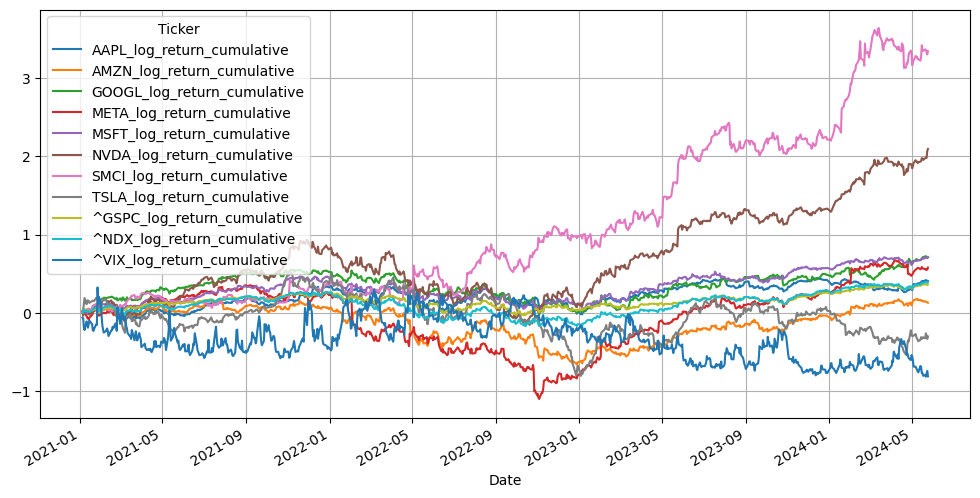

In [38]:
df.plot.line(y=[col_name for col_name in stock_ts().columns if "log_return_cumulative" in col_name], figsize=(12, 6), grid=True)

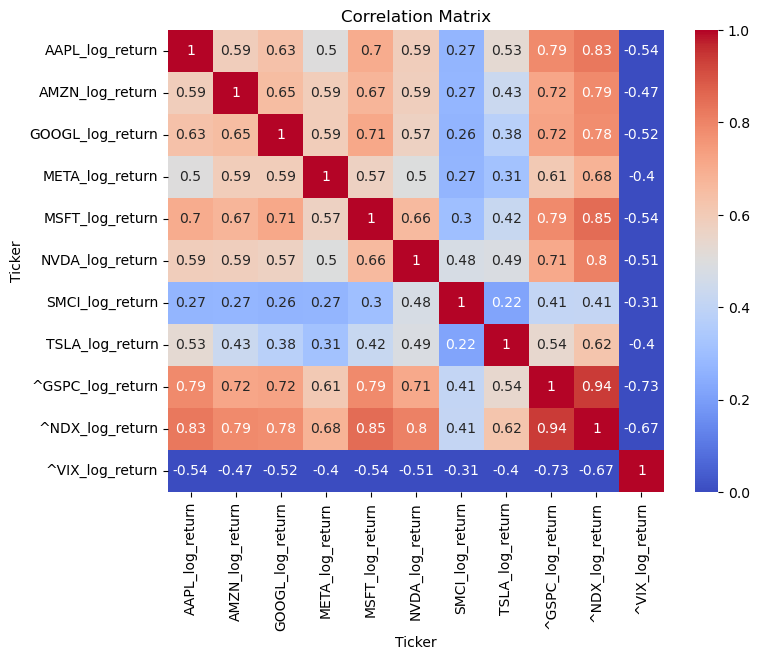

In [39]:
corr_matrix = stock_ts()[[col_name for col_name in stock_ts().columns if "log_return" in col_name and "_cumulative" not in col_name]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=0.0, vmax=1, center=0.5)
plt.title('Correlation Matrix')
plt.show()

<Axes: xlabel='^GSPC_log_return', ylabel='^VIX_log_return'>

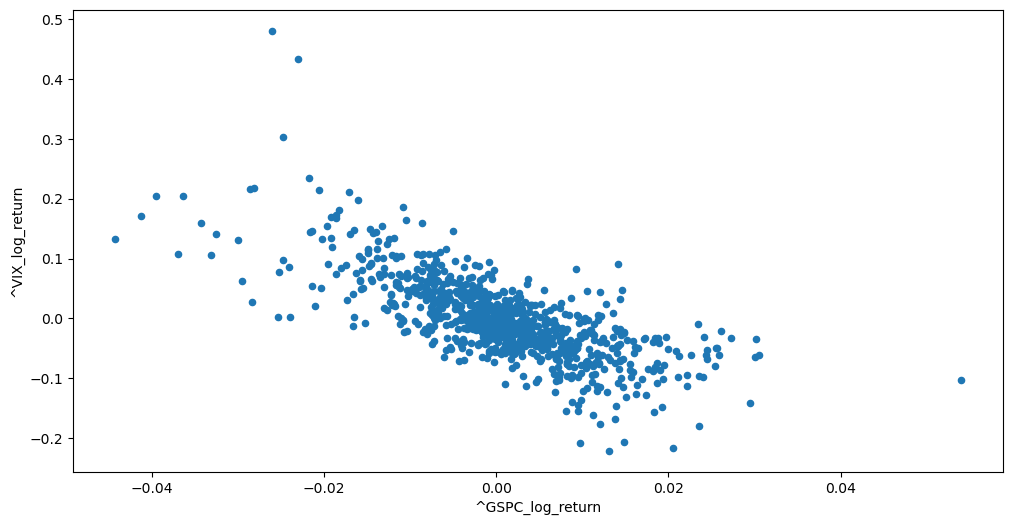

In [40]:
df[["^GSPC_log_return", "^VIX_log_return"]].plot(kind='scatter', x="^GSPC_log_return", y="^VIX_log_return", figsize=(12, 6))

<Axes: xlabel='^GSPC_log_return', ylabel='^NDX_log_return'>

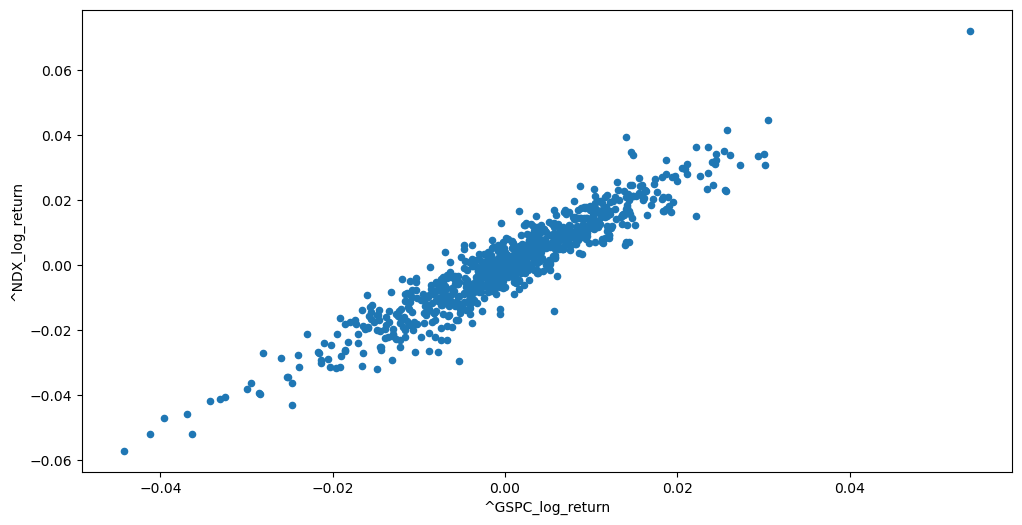

In [41]:
df[["^GSPC_log_return", "^NDX_log_return"]].plot(kind='scatter', x="^GSPC_log_return", y="^NDX_log_return", figsize=(12, 6))

In [42]:
import sklearn
from sklearn.linear_model import LinearRegression

In [43]:
beta_regression_cols = [col_name for col_name in df.columns if "log_return" in col_name and "_cumulative" not in col_name]
df = df.dropna()

beta_results = []
for i in range(0, len(beta_regression_cols)):
    for j in range(0, len(beta_regression_cols)):
        if i != j:
            X, y = df[beta_regression_cols[i]].values.reshape(-1, 1), df[beta_regression_cols[j]].values
            model = LinearRegression(fit_intercept=False).fit(X, y)
            beta, r2_score = model.coef_[0], model.score(X, y)
            record = [beta_regression_cols[i], beta_regression_cols[j], beta, r2_score]
            beta_results.append(record)

reg_df = pd.DataFrame.from_records(beta_results, columns=["X", "y", "beta", "r2_score"])

        


In [44]:
reg_df.pivot(index="X", columns="y", values="beta").fillna(1.0)

y,AAPL_log_return,AMZN_log_return,GOOGL_log_return,META_log_return,MSFT_log_return,NVDA_log_return,SMCI_log_return,TSLA_log_return,^GSPC_log_return,^NDX_log_return,^VIX_log_return
X,,,,,,,,,,,
AAPL_log_return,1.000000,0.781581,0.735274,0.878352,0.693245,1.132441,0.687829,1.131354,0.489982,0.707038,-2.194500
AMZN_log_return,0.443272,1.000000,0.567039,0.775570,0.502323,0.847063,0.523633,0.696299,0.336034,0.505467,-1.434424
GOOGL_log_return,0.547797,0.744882,1.000000,0.891694,0.608882,0.952703,0.589856,0.698016,0.390535,0.575046,-1.821967
META_log_return,0.288344,0.448917,0.392904,1.000000,0.324654,0.550374,0.396318,0.385671,0.216878,0.333720,-0.927850
MSFT_log_return,0.707003,0.903277,0.833484,1.008588,1.000000,1.281718,0.791238,0.913278,0.495126,0.733227,-2.204713
NVDA_log_return,0.305476,0.402885,0.344944,0.452249,0.339015,1.000000,0.638587,0.539731,0.229670,0.357177,-1.072358
SMCI_log_return,0.104212,0.139884,0.119953,0.182910,0.117546,0.358670,1.000000,0.179184,0.099242,0.137745,-0.490687
TSLA_log_return,0.245474,0.266384,0.203284,0.254908,0.194302,0.434134,0.256609,1.000000,0.156517,0.247796,-0.757767
^GSPC_log_return,1.258789,1.522158,1.346674,1.697255,1.247254,2.187340,1.682802,1.853225,1.000000,1.289367,-4.765895


In [45]:
r2_matrix = reg_df.pivot(index="X", columns="y", values="r2_score").fillna(1.0)

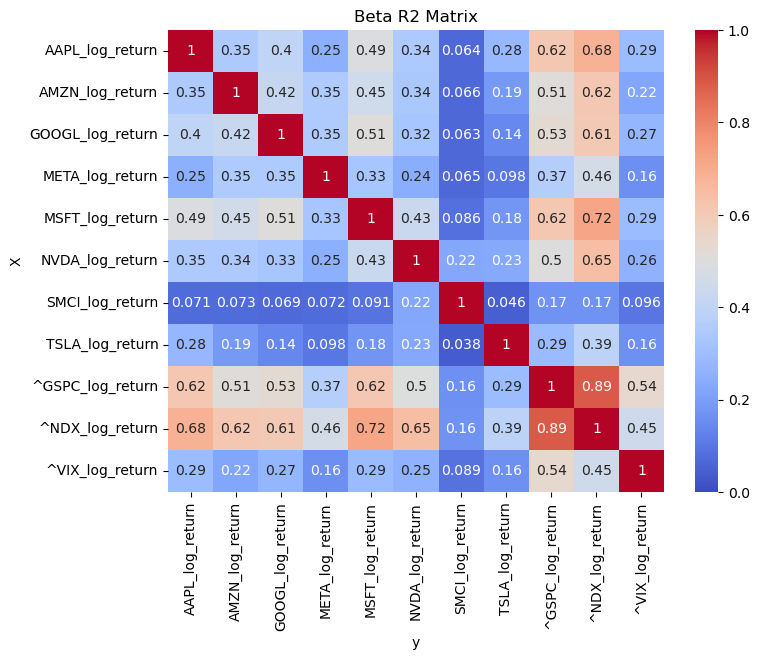

In [46]:
plt.figure(figsize=(8, 6))
sns.heatmap(r2_matrix, annot=True, cmap='coolwarm', vmin=0.0, vmax=1, center=0.5)
plt.title('Beta R2 Matrix')
plt.show()

In [48]:
stock_ts().head()

Ticker,AAPL,AMZN,GOOGL,META,MSFT,NVDA,SMCI,TSLA,^GSPC,^NDX,...,AMZN_log_return_cumulative,GOOGL_log_return_cumulative,META_log_return_cumulative,MSFT_log_return_cumulative,NVDA_log_return_cumulative,SMCI_log_return_cumulative,TSLA_log_return_cumulative,^GSPC_log_return_cumulative,^NDX_log_return_cumulative,^VIX_log_return_cumulative
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,126.830055,159.331497,86.306503,268.654968,211.224350,130.834000,31.049999,243.256668,3700.649902,12694.660156,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,128.398178,160.925507,87.002502,270.682800,211.428055,133.739792,31.160000,245.036667,3726.860107,12802.379883,...,0.009955,0.008032,0.007520,0.000964,0.021967,0.003536,0.007291,0.007058,0.008450,-0.062341
2021-01-06,124.076088,156.919006,86.143997,263.030914,205.945877,125.855431,31.889999,251.993332,3748.139893,12623.349609,...,-0.015257,-0.001885,-0.021156,-0.025307,-0.038795,0.026694,0.035285,0.012751,-0.005633,-0.073053
2021-01-07,128.309998,158.108002,88.717003,268.455170,211.806473,133.133667,32.189999,272.013336,3803.790039,12939.570312,...,-0.007709,0.027547,-0.000744,0.002752,0.017424,0.036057,0.111734,0.027489,0.019109,-0.187004
2021-01-08,129.417465,159.134995,89.891502,267.286407,213.097000,132.462738,31.879999,293.339996,3824.679932,13105.200195,...,-0.001234,0.040698,-0.005107,0.008827,0.012372,0.026380,0.187215,0.032966,0.031828,-0.223885


In [93]:
def realized_close_close_volatility_calculator(df: pd.DataFrame) -> pd.DataFrame:
    "function to calculate the realized close-close volatility of a given dataframe of log returns"
    mean_log_return = df.mean()
    n_samples = df.shape[0]
    variance_of_log_returns = ((df - mean_log_return)**2).sum()/(n_samples-1)
    annualized_variance = variance_of_log_returns*252
    annualized_volatility = np.sqrt(annualized_variance)

    return annualized_volatility

def rolling_realized_value_calculator(df: pd.DataFrame, returns_col_name: str, window: int, groupers: list[str] = None) -> pd.DataFrame:
    "function to calculate the rolling realized close-close volatility of a given dataframe of log returns, optionally grouped by a list of tickers"
    
    if groupers is not None:
        rolling_window = df.groupby(groupers)[[returns_col_name]].rolling(window=window)
    else:
        rolling_window = df[[returns_col_name]].rolling(window=window)

    return (
        rolling_window.apply(lambda x: realized_close_close_volatility_calculator(x, returns_col_name=returns_col_name), raw=True).dropna()
        .rename(columns={returns_col_name: f"{returns_col_name}_realized_volatility_{window}"})
    )
    
    

In [91]:
stock_ts().index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2024-05-13', '2024-05-14', '2024-05-15', '2024-05-16',
               '2024-05-17', '2024-05-20', '2024-05-21', '2024-05-22',
               '2024-05-23', '2024-05-24'],
              dtype='datetime64[ns]', name='Date', length=854, freq=None)

In [92]:
rolling_realized_value_calculator(stock_ts(), returns_col_name="^GSPC_log_return", window=30)

Ticker,^GSPC_log_return_realized_volatility_30
Date,
2021-02-17,0.144805
2021-02-18,0.145155
2021-02-19,0.144969
2021-02-22,0.141582
2021-02-23,0.140854
...,...
2024-05-20,0.123999
2024-05-21,0.124093
2024-05-22,0.120755


In [55]:
def realized_close_close_volatility_calculator(df: pd.DataFrame, returns_col_name: str) -> pd.DataFrame:
    mean_log_return = df[returns_col_name].mean()
    n_samples = df.shape(0)
    variance_of_log_returns = ((df[returns_col_name] - mean_log_return)**2).sum()/(n_samples-1)
    annualized_variance = variance_of_log_returns*252
    annualized_volatility = np.sqrt(annualized_variance)

    return annualized_volatility

rv_calc = (
    stock_ts()[["^GSPC_log_return"]]
    .dropna()
    .assign(
        mean_log_return=lambda df: df["^GSPC_log_return"].mean(),
        n_samples=lambda df: df["^GSPC_log_return"].count(),
        variance_of_log_returns=lambda df: ((df["^GSPC_log_return"] - df["mean_log_return"])**2).sum()/(df["n_samples"]-1),
        annualized_variance=lambda df: df["variance_of_log_returns"]*252,
        annualized_volatility=lambda df: np.sqrt(df["annualized_variance"]),
    )
)

In [56]:
rv_calc.head()

Ticker,^GSPC_log_return,mean_log_return,n_samples,variance_of_log_returns,annualized_variance,annualized_volatility
Date,,,,,,
2021-01-05,0.007058,0.000422,853,0.000114,0.02885,0.169853
2021-01-06,0.005694,0.000422,853,0.000114,0.02885,0.169853
2021-01-07,0.014738,0.000422,853,0.000114,0.02885,0.169853
2021-01-08,0.005477,0.000422,853,0.000114,0.02885,0.169853
2021-01-11,-0.006576,0.000422,853,0.000114,0.02885,0.169853
